# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [4]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

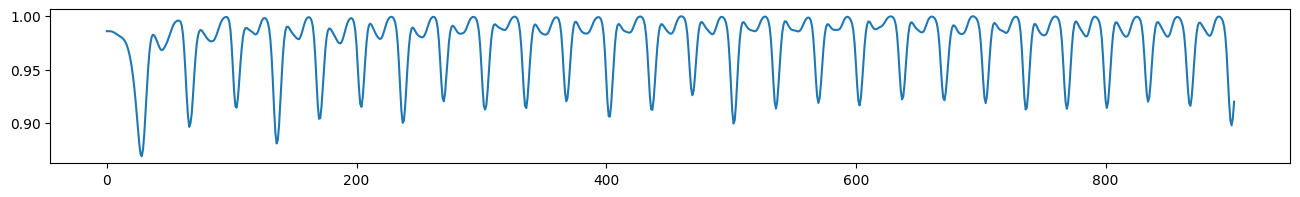

In [6]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [13]:
# INSERT YOUR CODE

window_size = 25  

# Вычисление матрицы расстояний
matrix_profile = stumpy.stump(ts, m=window_size)

# Поиск индексов цепочек с использованием функции allc
all_chains = stumpy.allc(matrix_profile[:, 2], matrix_profile[:, 3])

# Вывод индексов начала звеньев
print("Индексы начала звеньев всех цепочек:", all_chains[1])

Индексы начала звеньев всех цепочек: [199 331 398 432 863]


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

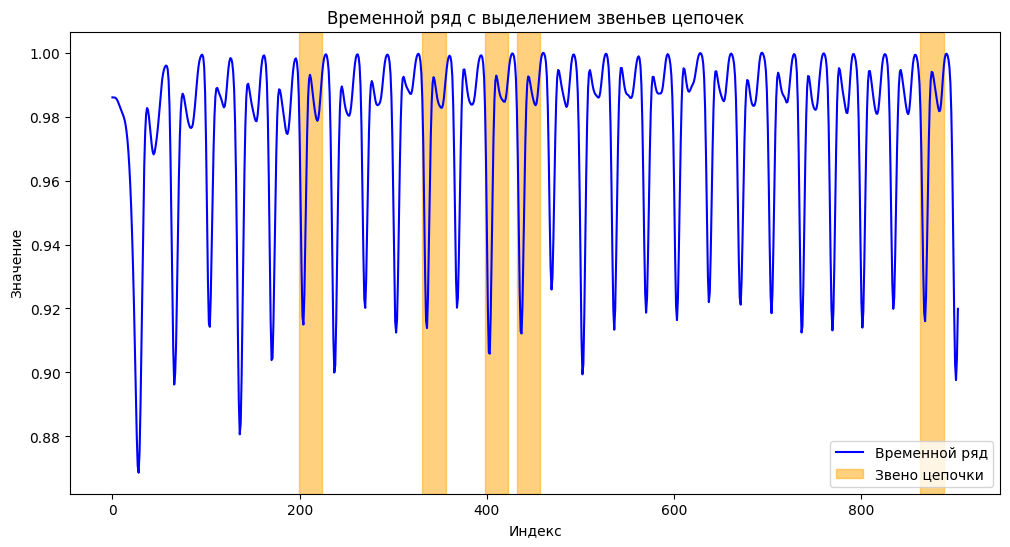

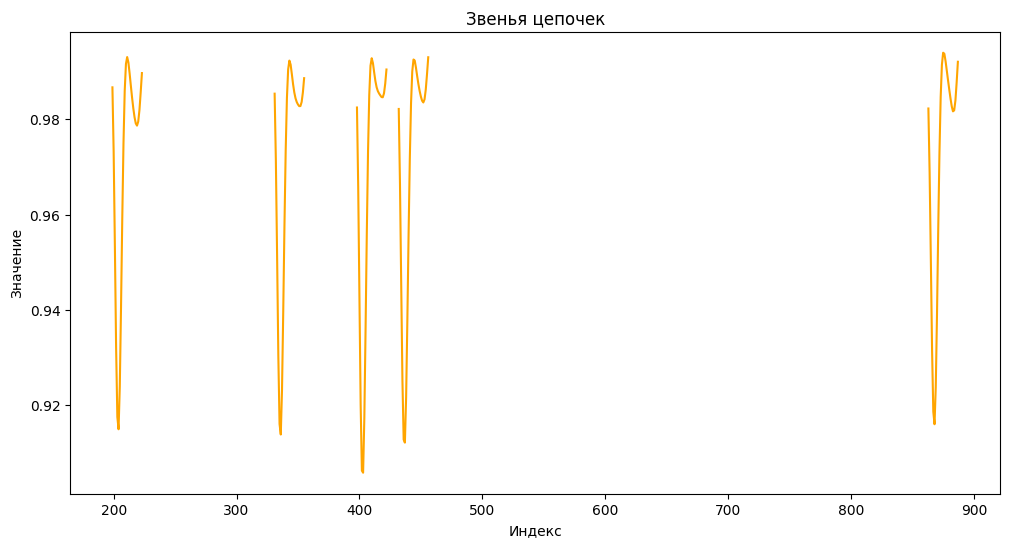

In [14]:
# INSERT YOUR CODE
import matplotlib.pyplot as plt

chain_starts = all_chains[1]

# Визуализация временного ряда с выделением звеньев цепочек
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Временной ряд', color='blue')
for start in chain_starts:
    plt.axvspan(start, start + window_size, color='orange', alpha=0.5, label='Звено цепочки' if start == chain_starts[0] else "")

plt.title('Временной ряд с выделением звеньев цепочек')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.show()

# Визуализация только звеньев цепочек
plt.figure(figsize=(12, 6))
for start in chain_starts:
    plt.plot(range(start, start + window_size), ts[start:start + window_size], color='orange')

plt.title('Звенья цепочек')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [15]:
# INSERT YOUR CODE
if len(chain_starts) >= 2:
    last_chain_index = chain_starts[-1]
    second_last_chain_index = chain_starts[-2]

    # Получаем последние два звена цепочки
    last_chain = ts[last_chain_index:last_chain_index + window_size]
    second_last_chain = ts[second_last_chain_index:second_last_chain_index + window_size]

    difference = last_chain - second_last_chain
    predicted_value = last_chain[-1] + difference[-1]
    true_value = ts[last_chain_index + window_size]

    print(f"Предсказанное значение: {predicted_value}")
    print(f"Истинное значение: {true_value}")
    print(f"Ошибка предсказания: {abs(predicted_value - true_value)}")
else:
    print("Недостаточно звеньев цепочек для предсказания.")

Предсказанное значение: 0.9911283999999999
Истинное значение: 0.99579537
Ошибка предсказания: 0.004666970000000048


❓ Проанализируйте и изложите содержательный смысл полученных результатов.